In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

In [2]:
data=pd.read_csv("Wholesale customers data.csv")
print(data.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [3]:
#normalize the data
scaled=normalize(data)
scaled=pd.DataFrame(scaled,columns=data.columns)
print(scaled.head())

    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  0.000112  0.000168  0.708333  0.539874  0.422741  0.011965   
1  0.000125  0.000188  0.442198  0.614704  0.599540  0.110409   
2  0.000125  0.000187  0.396552  0.549792  0.479632  0.150119   
3  0.000065  0.000194  0.856837  0.077254  0.272650  0.413659   
4  0.000079  0.000119  0.895416  0.214203  0.284997  0.155010   

   Detergents_Paper  Delicassen  
0          0.149505    0.074809  
1          0.206342    0.111286  
2          0.219467    0.489619  
3          0.032749    0.115494  
4          0.070358    0.205294  


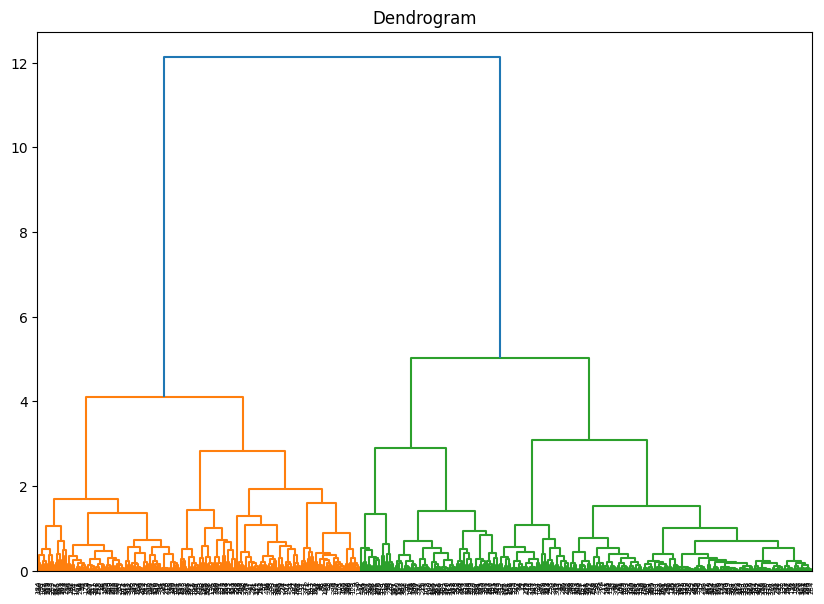

In [4]:
#dendrogram to determine the number of clusters
#x axis: samples ; y axis: distance between samples
plt.figure(figsize=(10,7))
plt.title("Dendrogram")
Z=linkage(scaled,method='ward')
dendrograms=dendrogram(Z)

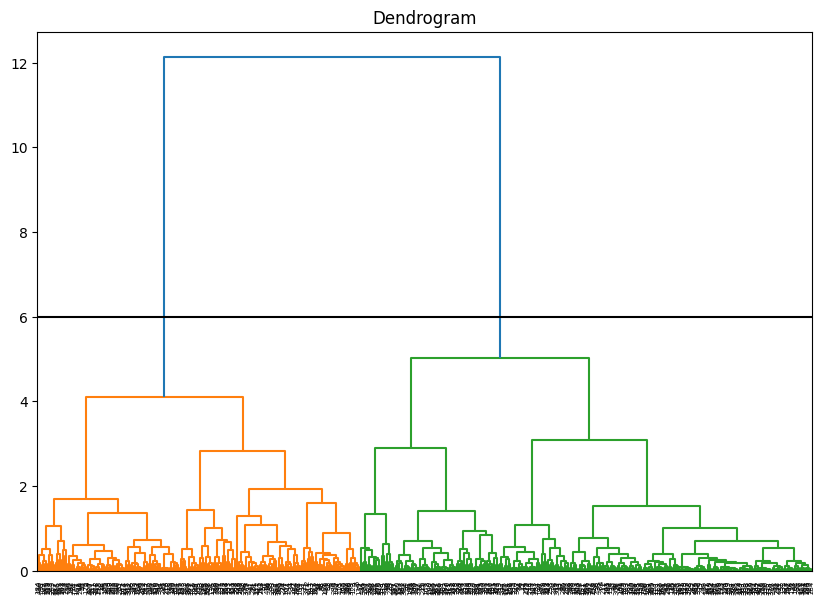

In [5]:

#threshold
#from the dendrogram we choose y=6 as the threshold
plt.figure(figsize=(10,7))
plt.title("Dendrogram")
Z=linkage(scaled,method='ward')
dendrograms=dendrogram(Z)
plt.axhline(y=6,color='black')

In [9]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster.fit_predict(scaled)
cluster = AgglomerativeClustering(n_clusters=2, linkage='complete', metric='euclidean')
cluster.fit_predict(scaled)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,

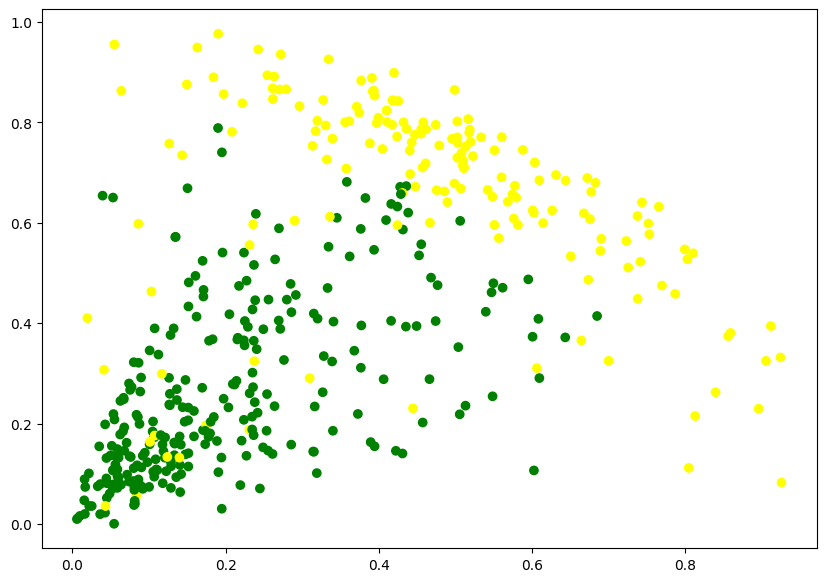

In [10]:

#visualization
plt.figure(figsize=(10,7))
plt.scatter(scaled['Milk'],scaled['Grocery'],c=cluster.labels_,cmap = mcolors.ListedColormap(["yellow", "green"]))

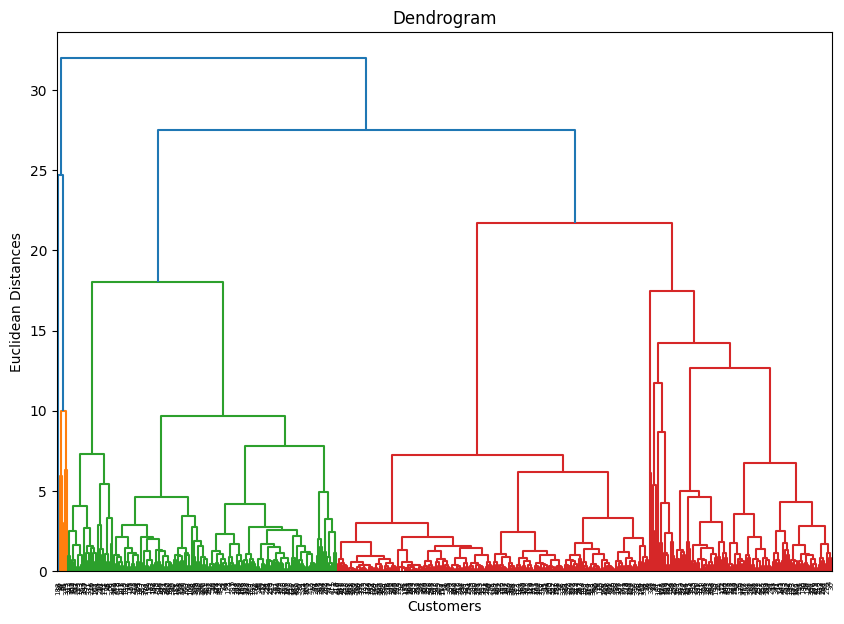

0.2670148241989557

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Load the dataset
file_path = '/content/Wholesale customers data.csv'
wholesale_data = pd.read_csv(file_path)

# Select the spending columns for clustering
spending_data = wholesale_data.iloc[:, 2:]

# Normalize the data
scaler = StandardScaler()
spending_data_normalized = scaler.fit_transform(spending_data)

# Plot the dendrogram to find the optimal number of clusters
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(spending_data_normalized, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()


agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster_labels = agg_clustering.fit_predict(spending_data_normalized)

# Calculate the silhouette score to evaluate clustering
silhouette_avg = silhouette_score(spending_data_normalized, cluster_labels)

# Output the silhouette score
silhouette_avg
